# Lista de Exercícios Nº 1 de Computação Gráfica

<br>
<center>**Jonas de Araújo Luz Jr. <unifor@jonasluz.com>**
<br>Março de 2017</center>

<hr>


In [1]:
from typing import List
Vector = List[float]

import numpy as np
import matplotlib.pyplot as plt

def dcos(v: Vector, verbose=False):
    """
    Calcula os cosenos diretores do vetor a.
    Para cada componente c1, c2, ... cn do vetor v, o cosseno diretor é dado por:
        dcosk = ck / ||v||
    """
    result = []
    
    norm = np.linalg.norm(v)    # norma do vetor dado ||v||
    if verbose:
        print("A norma do vetor {} é {}".format(v, norm))
    
    for component in v:
        result.append(component / norm)
        
    return result

## Questão 1

**Demonstrar graficamente a propriedade comutativa da adição de vetores, ou seja, que *u + v = v + u*.**

In [2]:
def line_limits(x, y, length, axes_size):
    """
    Função utilitária para calcular as dimensões da seta do vetor nos eixos x e y.
    A seta representa um triângulo retângulo, cuja hipotenusa é o comprimento da seta.
    """
    v = [x, y]
    # O coseno diretor do vetor v é o mesmo da seta
    dc = dcos(v)
    # x e y são aproximados em função dos valores do coseno diretor
    x, y = (v[0] + dc[0] * length), (v[1] + dc[1] * length)
    
    return (x, y, x / axes_size, y / axes_size)

def draw_vector(name:str, origin_x, origin_y, x, y, axes_size, fc='k', lc='b', 
                labelPos=dict(ha="right", va="bottom"), withProjs=True, immediate=False):
    """
    Desenha o vetor especificado.
    """
    
    # Propriedades da ponta das setas dos vetores
    arrowtip  = dict(head_width=0.2, head_length=0.2)
    # Propriedades das linhas de projeção aos eixos
    lineprops = dict(linewidth=0.5, ls='--') 
    # Posição da nota com nome do vetor.
    notexy = (x / 2 + origin_x, y / 2 + origin_y)
    # Recupera os eixos de coordenadas.
    ax = plt.axes()
    plt.axis([0, axes_size, 0, axes_size])
    
    # Vetor 
    limits = line_limits(x, y, arrowtip['head_width'], axes_size)
    ax.arrow(origin_x, origin_y, x, y, **arrowtip, fc=fc, ec=fc)
    ax.annotate(name, xy=notexy, xytext=notexy, **labelPos, color=fc,
                family="serif", weight="semibold", size="x-large")
    if withProjs:
        plt.axhline(limits[1], xmax=limits[2], color=lc, **lineprops)
        plt.axvline(limits[0], ymax=limits[3], color=lc, **lineprops)
    
    if immediate: 
        plt.show()


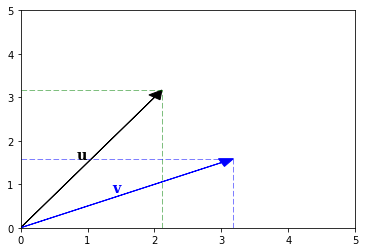

In [3]:
# Solução da questão 1
#
axessize = 5

# Vetor u
u = [2, 3]
draw_vector('u', 0, 0, *u, axessize, 'k', 'g')

# Vetor v
v = [3, 1.5]
draw_vector('v', 0, 0, *v, axessize, 'b', 'b')

plt.show()

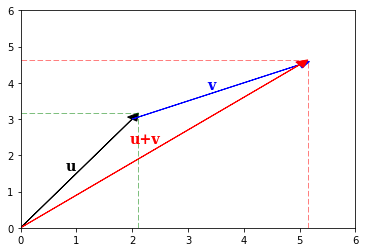

In [4]:
## Plotagem de u + v
#
axessize = 6

# Desenha u novamente
draw_vector('u', 0, 0, *u, axessize, 'k', 'g')

# Desenha v a partir de u
draw_vector('v', *u, *v, axessize, 'b', withProjs=False)

# Vetor u + v
uv = [u[0] + v[0], u[1] + v[1]]
draw_vector('u+v', 0, 0, *uv, axessize, 'r', 'r')

plt.show()

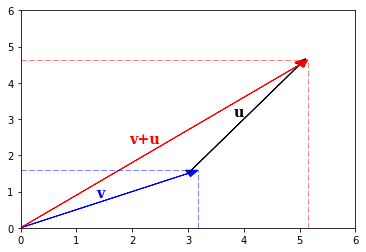

In [5]:
## Plotagem de v + u 
#
axessize = 6

# Desenha v novamente
draw_vector('v', 0, 0, *v, axessize, 'b', 'b')

# Desenha u a partir de v
draw_vector('u', *v, *u, axessize, 'k', withProjs=False)

# Vetor v + u
vu = [v[0] + u[0], v[1] + u[1]]
draw_vector('v+u', 0, 0, *uv, axessize, 'r', 'r')

plt.show()

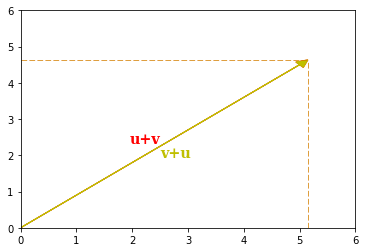

In [6]:
## Sobrepondo u+v e v+u
# 
axessize = 6

draw_vector('u+v', 0, 0, *uv, axessize, 'r', 'r')
draw_vector('v+u', 0, 0, *vu, axessize, 'y', 'y', labelPos=dict(ha="left", va="top"))

plt.show()

## Questão 2

**Calcular os cossenos diretores para os vetores indicados.** 


In [7]:
def print_dcos(dcos: Vector):
    """
    Faz uma impressão "bonita" da sequência dos cosenos diretores guardados no vetor dcos.
    """
    indices = ['i', 'j', 'k']
    print('\n'.join('Coseno diretor {} é {:.4}'.format(indices[k], v) for k, v in list(enumerate(dcos))))


**a) h** = [3, 6]

In [8]:
print_dcos(dcos([3, 6], True))

A norma do vetor [3, 6] é 6.708203932499369
Coseno diretor i é 0.4472
Coseno diretor j é 0.8944


**b) k** = [-4, 8]

In [9]:
print_dcos(dcos([-4, 8], True))

A norma do vetor [-4, 8] é 8.94427190999916
Coseno diretor i é -0.4472
Coseno diretor j é 0.8944


**c) m** = [5, -4]

In [10]:
print_dcos(dcos([5, -4], True))

A norma do vetor [5, -4] é 6.4031242374328485
Coseno diretor i é 0.7809
Coseno diretor j é -0.6247


**d) n** = [3, 0]print(dcos([-4, 8], True))

In [11]:
print_dcos(dcos([3, 0], True))

A norma do vetor [3, 0] é 3.0
Coseno diretor i é 1.0
Coseno diretor j é 0.0


## Questão 3

**Encontrar os vetores iniciando no ponto *P* e terminando no ponto *Q*, para cada caso abaixo:**

In [21]:
def vecpoints(a, b):
    a, b = np.array(a), np.array(b)
    
    return b - a

**a)** P(4, 8), Q(3, 7)

In [25]:
print(vecpoints([4, 8], [3, 7]))

[-1 -1]


**b)** P(3, -5), Q(-4, -7)

In [26]:
print(vecpoints([3, -5],[-4, -7]))

[-7 -2]


**c)** P(-5, 0), Q(-3, 1)

In [27]:
print(vecpoints([-5, 0], [-3, 1]))

[2 1]


**d)** P(3, 3), Q(4, 4)

In [29]:
print(vecpoints([3, 3], [4, 4]))

[1 1]


## Questão 4

**Sendo *a = ax.i + ay.j + az.k* e *b = bx.i + by.j + bz.k*, apresentar *a X b* na forma de matriz.
<br><u>Sugestão:</u> usar  o conceito de *determinante* de uma matriz.**

In [16]:
# Demonstração sem código.

## Questão 5

**Sendo *a = 3i + 5j* e *b = 2i + j*, calcular o ângulo entre *a* e *b*, usando o produto interno.**

In [17]:
def intern_angle(a: Vector, b: Vector, verbose=False, degrees=True):
    """
    Calcula o ângulo interno entre dois vetores a partir do produto interno entre eles.
    O produto interno é dado por ||a||.||b||.cos(tetha), sendo tetha o ângulo entre os vetores a e b.
    Logo, temos que tetha = arccos((a.b)/(||a||.||b||))
    """
    #a, b = np.array(a), np.array(b)
    
    # Produto interno entre a e b
    dp = np.dot(a, b)
        
    # Normas dos vetores a e b
    na, nb = np.linalg.norm(a), np.linalg.norm(b)
    
    # Cosseno de tetha
    cosin = dp / (na * nb)
    
    if verbose:
        print("O produto interno entre {} e {} é: {}".format(a, b, dp))
        print("As normas dos vetores a e b são, respectivamente: {:.4} e {:.4}".format(na, nb))
        print("O cosseno do ângulo entre a e b é {:.6}".format(cosin))

    ac = np.arccos(cosin) # ângulo em radianos [0, pi]
    if degrees:
        result = ac * 180 / np.pi
        if verbose:
            print("O ângulo {:.4} radianos corresponde a {:.8}º".format(ac, result))
        return result
    return ac

## Solução da questão 5.
#
a, b = [3, 5], [2, 1]
print("O ângulo interno entre a e b é de {:.8}º".format(intern_angle(a, b, True)))

O produto interno entre [3, 5] e [2, 1] é: 11
As normas dos vetores a e b são, respectivamente: 5.831 e 2.236
O cosseno do ângulo entre a e b é 0.843661
O ângulo 0.5667 radianos corresponde a 32.471192º
O ângulo interno entre a e b é de 32.471192º


## Questão 6

**Sendo os pontos *P(3, 4, 7)* e *Q(2, 1, 9)*, calcular o ângulo entre *OP* e *OQ*, sendo *O* a origem.**

In [18]:
## Solução da questão 6.
#

# Os segmentos de reta entre os pontos P e origem e entre Q e origem correspondem, respectivamente, aos vetores p e q:
p, q = [3, 4, 7], [2, 1, 9]

print("O ângulo interno entre OP e OQ é {:.8}º".format(intern_angle(p, q, True)))

O produto interno entre [3, 4, 7] e [2, 1, 9] é: 73
As normas dos vetores a e b são, respectivamente: 8.602 e 9.274
O cosseno do ângulo entre a e b é 0.915077
O ângulo 0.4151 radianos corresponde a 23.783295º
O ângulo interno entre OP e OQ é 23.783295º


## Questão 7

**Sendo os pontos *P(1, 4, 2)*, *A(4, -1, 4)* e *B(5, 3, 6)*, determinar se *OP* e *AB* são paralelos, sendo *O* a origem.**

In [19]:
P, A, B, O = np.array([1, 4, 2]), np.array([4, -1, 4]), np.array([5, 3, 6]), np.array([0, 0, 0])

# O segmento de reta OP corresponde ao vetor p [1, 4, 2].
p = P - O # == P
# O segmento de reta AB corresponde ao vetor v = B - A.
v = B - A

# p e v serão paralelos se o ângulo entre eles tetha for igual a zero, ou seja, cos(tetha) == 1
# Desta forma, o produto interno entre os vetores, dado por ||p||.||v||.cos(tetha), pode ser usado para se determinar
# o ângulo entre estes: temos que tetha = arccos((a.b)/(||a||.||b||))
# 
tetha = intern_angle(p, v, True)
print("O ângulo entre os vetores é de {:.8}º, logo, os segmentos de reta OP e AB {} paralelos."
      .format(tetha, "são" if tetha == 0 else "não são"))

O produto interno entre [1 4 2] e [1 4 2] é: 21
As normas dos vetores a e b são, respectivamente: 4.583 e 4.583
O cosseno do ângulo entre a e b é 1.0
O ângulo 0.0 radianos corresponde a 0.0º
O ângulo entre os vetores é de 0.0º, logo, os segmentos de reta OP e AB são paralelos.


## Questão 8

**Calcular os comprimentos dos cossenos diretores dos vetores *AB*, abaixo, determinando também os ângulos alpha, beta e gama formados entre esses vetores e os eixos de coordenadas na direção positiva. E, por fim, mostrar que, em cada caso, cos2(alpha) + cos2(beta) + cos2(gama) = 1.**

In [58]:
def q8(v):
    """
    Rotina para a questão 8.
    """    
    # Cossenos diretores.
    dc = dcos(v, True)
    print_dcos(dc)
    
    # Cálculo dos ângulos "diretores".
    angles_names = ['alpha', 'beta', 'gamma']
    angles = {}
    for k, name in enumerate(angles_names):
        angles[name] = np.arccos(dc[k]) * 180/np.pi
        print("O ângulo {} tem o valor de {:.6}".format(name, angles[name]))
    
    # Verificação da combinação afim.
    sum, output = 0, ""
    for c in dc:
        part = c*c
        sum += part
        if (output != ""):
            output += " + "
        output += "({:.4})^2".format(c)
    print("{} = {:.2}".format(output, sum))
    

**a)** A(1,1,1) e B(2,0,1)

In [59]:
v = vecpoints([1, 1, 1], [2, 0, 1])
q8(v)

A norma do vetor [ 1 -1  0] é 1.4142135623730951
Coseno diretor i é 0.7071
Coseno diretor j é -0.7071
Coseno diretor k é 0.0
O ângulo alpha tem o valor de 45.0
O ângulo beta tem o valor de 135.0
O ângulo gamma tem o valor de 90.0
(0.7071)^2 + (-0.7071)^2 + (0.0)^2 = 1.0


**b)** A(2, -1, 1) e B(-2, -2, 2)

In [60]:
v = vecpoints([2, -1, 1], [-2, 2, 2])
q8(v)

A norma do vetor [-4  3  1] é 5.0990195135927845
Coseno diretor i é -0.7845
Coseno diretor j é 0.5883
Coseno diretor k é 0.1961
O ângulo alpha tem o valor de 141.671
O ângulo beta tem o valor de 53.9601
O ângulo gamma tem o valor de 78.6901
(-0.7845)^2 + (0.5883)^2 + (0.1961)^2 = 1.0


**c)** A(-1, 3, 1) e B(-2, -1, 0)

In [61]:
v = vecpoints([-1, 3, 1], [-2, -1, 0])
q8(v)

A norma do vetor [-1 -4 -1] é 4.242640687119285
Coseno diretor i é -0.2357
Coseno diretor j é -0.9428
Coseno diretor k é -0.2357
O ângulo alpha tem o valor de 103.633
O ângulo beta tem o valor de 160.529
O ângulo gamma tem o valor de 103.633
(-0.2357)^2 + (-0.9428)^2 + (-0.2357)^2 = 1.0
